# MDS hw3 
R10725026 資管碩一 黃奕滔

## 1.
### (a).
讓我最印象深刻的主題是講解預測設備保養的流程，處長提到了六個步驟，依序分別是資料數位擷取、特徵提取、設備異常示警、設備區域預警、設備健康診斷、剩餘壽命預測，我原本沒有意識到機台的老化是連續性的，所以很有可能一些設備雖然偏離正常值了，但依舊還是可以運作，原先在我想像中，機台的壞掉與否是0或1的數值，在聽到處長講解設備異常示警、設備區域預警和壽命預測的時候，才對問題有更深入的認識，知道預測的label可以是「剩餘多少壽命」。
### (b).
有一些認知不一樣，我原先以為製造業的廠區會很像實驗室環境，也就是說不管特徵、數據搜集等等都不是太困難的事，而且雜訊並不會太多，沒想到安裝sensor的過程中也會遇到很多狀況，例如有時候感應器放的位置可能會影響到機台作動，這樣工程師就必須妥協，用相對比較品質沒那麼高的資料搜集來換取廠區機台的安全性。總的來說，我原本以為在廠區中的資料科學案子會很好做，但其實實際上的資料還是得做很多預處理與特徵工程。
### (c).
我覺得製造業走在比較前面的一步至少是大部分的資料與檔案都比較數位化了，相對傳統產業很多資訊還在紙本上，所以接下來遇到的挑戰應該是特徵相關的問題，依我自己的經驗，有時候廠區自己也不知道哪些特徵跟機台的壽命、產品的良率相關，搜集與整理老師傅的知識體系是很重要的事，就算今天並不是要以啟發式演算法來進行分析，了解有經驗、知識的人對哪些特徵更為看重，也能讓資料分析、AI的發展事半功倍。
### (d).
有，依照我的經驗，通常在廠區做資料分析還蠻常遇到資料隨著時間有偏移的現象，這個偏移可能是有系統性的偏移，也有可能沒有，甚至因為廠區的人因為意識到機台偏移了，所以手動調整參數，使得機台運作符合預期，如此一來所有蒐集到的特徵都經過干擾，甚至我們也不知道何時做過手動調整，使得分析變得極度困難，不知道現在實務場域對這個問題有沒有一套解決方法？
### (e).
我覺得高單價的代工製品所要求的預測準確度非常非常高，依照現在的領域知識可能都沒辦法人工列出哪些因子是重要的，然而數據科學還是要基於人類的智慧引導學習的方向，或許現在應該努力的方向不只是聘用一堆數據科學家，對資料深入的分析，而是應該多訪談實務上as-is的操作員們，看看他們平常是如何觀察機台、產品的良率，並且做一些實驗性的驗證與敏感度分析，再依此建立模型，效率會高上許多。

## 2.
### (a).
1. 大略看過資料樣式與型態，還有dataframe summary。
2. 看一下有沒有需要做缺失值太多的columns或是一些不必要的columns可以刪除。
3. 填補缺失值(imputation)
4. 檢查inbalance的情況並且套用資料平衡的方法
5. 進行特徵篩選，挑選出重要變數
6. 用重要變數建模，並調整參數。

In [1]:
import pandas as pd
import os 

steelplates_cols = pd.read_excel(os.path.join("MDS_Assignment3_Steelplates.xlsx"), 0, header=None)[0]
steelplates = pd.read_excel(os.path.join("MDS_Assignment3_Steelplates.xlsx"), 1, header=None)
steelplates.columns = steelplates_cols

In [2]:
steelplates

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


In [3]:
# data summary
steelplates.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### (b).

In [4]:
steelplates.isna().sum().sum()

0

In [5]:
steelplates = steelplates.drop("TypeOfSteel_A400", axis=1)

資料中沒有完全相同的欄位，也沒有缺失值，但是有一些column之間存在互補關係(redundant columns)，意即某些欄位為0另一個欄位就會是1，這會讓一些一樣的決策樹形狀變得差很多，可以移除其中一個欄位以提高穩定性。
### (c).
為了使用sklearn的decision tree classifier，我們必須把y的各個class編碼

In [6]:
label_names = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
labels = steelplates[label_names]

In [7]:
import numpy as np
labels = labels.apply(lambda r: np.argmax(r), axis=1)
steelplates["labels"] = labels
steelplates = steelplates.drop(label_names, axis=1)

In [8]:
steelplates

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,labels
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,6
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,6
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,6
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,6


In [9]:
X = steelplates.drop("labels", axis=1)
y = steelplates["labels"]

In [10]:
from sklearn.model_selection import cross_validate
from sklearn import tree
clf = tree.DecisionTreeClassifier()
scores = cross_validate(clf, X, y, cv=10, scoring=["accuracy", 'roc_auc_ovr', 'f1_macro'])

In [11]:
scores

{'fit_time': array([0.02493405, 0.0254457 , 0.02612424, 0.02456999, 0.02525806,
        0.02458668, 0.02585721, 0.02559924, 0.02493477, 0.02476597]),
 'score_time': array([0.00592852, 0.00577068, 0.00567174, 0.00595856, 0.00570703,
        0.00573516, 0.00566125, 0.00568295, 0.00603008, 0.00575757]),
 'test_accuracy': array([0.42051282, 0.6185567 , 0.58247423, 0.55154639, 0.56701031,
        0.59278351, 0.64948454, 0.62371134, 0.64948454, 0.43814433]),
 'test_roc_auc_ovr': array([0.66712654, 0.77233326, 0.77656696, 0.73388486, 0.77433474,
        0.80872382, 0.82791632, 0.82618204, 0.83570538, 0.63280667]),
 'test_f1_macro': array([0.45900679, 0.62657647, 0.63298327, 0.55562946, 0.61902958,
        0.64958564, 0.68159251, 0.64839245, 0.68232976, 0.40296216])}

### (d).
我們可以使用smote來處理資料不平衡的問題

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)


In [13]:
np.unique(y_smote, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([673, 673, 673, 673, 673, 673, 673]))

Label從0~6分別都有673個
### (e).

In [14]:
smote_clf = tree.DecisionTreeClassifier()
smote_scores = cross_validate(clf, X_smote, y_smote, cv=10, scoring=["accuracy", 'roc_auc_ovr', 'f1_macro'])

In [15]:
smote_scores

{'fit_time': array([0.08135176, 0.07354498, 0.07244015, 0.06938505, 0.0697825 ,
        0.06986833, 0.07221818, 0.06806231, 0.0716722 , 0.06920075]),
 'score_time': array([0.00624537, 0.0060482 , 0.00612068, 0.00607848, 0.00604463,
        0.00631666, 0.00599933, 0.00603151, 0.00596809, 0.00604963]),
 'test_accuracy': array([0.77330508, 0.78556263, 0.74522293, 0.79617834, 0.80467091,
        0.80254777, 0.89384289, 0.83014862, 0.88322718, 0.84076433]),
 'test_roc_auc_ovr': array([0.86795025, 0.87475606, 0.85118665, 0.88081466, 0.88583593,
        0.8849727 , 0.93808264, 0.90080469, 0.9320863 , 0.90752835]),
 'test_f1_macro': array([0.77594951, 0.77940771, 0.74684406, 0.78613044, 0.79368216,
        0.80104782, 0.89200812, 0.8150946 , 0.88009354, 0.82508608])}

### (f).

In [16]:
for met in ["test_accuracy", "test_roc_auc_ovr", "test_f1_macro"]:
    print(f"{met} difference: {smote_scores[met] - scores[met]}")

test_accuracy difference: [0.35279226 0.16700593 0.1627487  0.24463195 0.2376606  0.20976427
 0.24435835 0.20643728 0.23374264 0.40262   ]
test_roc_auc_ovr difference: [0.20082371 0.10242279 0.07461969 0.1469298  0.11150119 0.07624888
 0.11016632 0.07462265 0.09638093 0.27472168]
test_f1_macro difference: [0.31694272 0.15283124 0.11386079 0.23050098 0.17465258 0.15146218
 0.21041561 0.16670216 0.19776378 0.42212393]


套用了smote方法解決資料不平衡的問題之後，不管是AUC、accuracy、f1等等都上升了很多，代表資料不平衡真的是預測過程中需要被獨立出來處理的問題。  
否則電腦可能會學習到一律去猜測最高機率的不良品情況。
### (g).

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier(max_depth=4, random_state=0)
scores = cross_validate(rf, X, y, cv=10, scoring=["accuracy", 'roc_auc_ovr', 'f1_macro'])

In [19]:
scores

{'fit_time': array([0.23625231, 0.22787118, 0.2303865 , 0.2318964 , 0.23284411,
        0.23290491, 0.23020959, 0.22915363, 0.22824669, 0.2275393 ]),
 'score_time': array([0.02374506, 0.02306867, 0.02366829, 0.02334952, 0.0241282 ,
        0.02296567, 0.02331591, 0.02312231, 0.02269197, 0.02435589]),
 'test_accuracy': array([0.37435897, 0.6185567 , 0.48453608, 0.64948454, 0.60824742,
        0.51030928, 0.6443299 , 0.59278351, 0.62371134, 0.53092784]),
 'test_roc_auc_ovr': array([0.77329003, 0.93611624, 0.8868882 , 0.8696827 , 0.87474389,
        0.87552841, 0.91999818, 0.93248263, 0.92376005, 0.80743432]),
 'test_f1_macro': array([0.19567052, 0.49436702, 0.45402757, 0.51843552, 0.45641046,
        0.4736611 , 0.5155338 , 0.44924669, 0.49419564, 0.33999596])}

In [20]:
rf_smote = RandomForestClassifier(max_depth=4, random_state=0)
smote_scores = cross_validate(rf_smote, X_smote, y_smote, cv=10, scoring=["accuracy", 'roc_auc_ovr', 'f1_macro'])

In [21]:
smote_scores

{'fit_time': array([0.47080517, 0.46411014, 0.46472716, 0.45830798, 0.45828986,
        0.4566834 , 0.45608473, 0.45678234, 0.45529151, 0.45522809]),
 'score_time': array([0.02735543, 0.02794552, 0.02735972, 0.02703714, 0.02713132,
        0.02687263, 0.02756858, 0.02758527, 0.02715635, 0.02743912]),
 'test_accuracy': array([0.65677966, 0.79830149, 0.6985138 , 0.70276008, 0.76008493,
        0.71549894, 0.77494692, 0.76857749, 0.77707006, 0.81528662]),
 'test_roc_auc_ovr': array([0.90242632, 0.95992198, 0.93830685, 0.92609413, 0.94280066,
        0.94097008, 0.94709656, 0.95464293, 0.95218885, 0.97215288]),
 'test_f1_macro': array([0.62575392, 0.792048  , 0.67599833, 0.6704046 , 0.73414046,
        0.6890876 , 0.763842  , 0.72949125, 0.75685565, 0.81216088])}

In [22]:
for met in ["test_accuracy", "test_roc_auc_ovr", "test_f1_macro"]:
    print(f"{met} difference: {smote_scores[met] - scores[met]}")

test_accuracy difference: [0.28242069 0.17974479 0.21397772 0.05327555 0.1518375  0.20518966
 0.13061702 0.17579399 0.15335872 0.28435879]
test_roc_auc_ovr difference: [0.12913629 0.02380574 0.05141865 0.05641144 0.06805677 0.06544166
 0.02709838 0.0221603  0.0284288  0.16471855]
test_f1_macro difference: [0.4300834  0.29768098 0.22197075 0.15196908 0.27772999 0.2154265
 0.24830819 0.28024456 0.26266001 0.47216492]


random forest預測模型也會因為使用oversampling的方法改善預測準確度，意即random forest對資料不平衡的抗性並不高。
### (h).

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier()
scores = cross_validate(gbdt, X, y, cv=10, scoring=["accuracy", 'roc_auc_ovr', 'f1_macro'])

In [24]:
gbdt_smote = GradientBoostingClassifier()
smote_scores = cross_validate(gbdt_smote, X_smote, y_smote, cv=10, scoring=["accuracy", 'roc_auc_ovr', 'f1_macro'])

In [25]:
scores

{'fit_time': array([5.14517641, 5.09871936, 5.14340329, 5.10864472, 5.11995244,
        5.12763834, 5.11042142, 5.09730887, 5.11873746, 5.08980608]),
 'score_time': array([0.01160789, 0.01045394, 0.01070714, 0.00944734, 0.0103066 ,
        0.01036859, 0.01052213, 0.00927258, 0.01048875, 0.0091331 ]),
 'test_accuracy': array([0.48205128, 0.67525773, 0.54123711, 0.67525773, 0.65463918,
        0.59793814, 0.7628866 , 0.7371134 , 0.64948454, 0.63917526]),
 'test_roc_auc_ovr': array([0.8230413 , 0.91854403, 0.89310324, 0.90573692, 0.89147863,
        0.89833277, 0.93616197, 0.95525409, 0.94290482, 0.82158054]),
 'test_f1_macro': array([0.45263801, 0.63109241, 0.59908198, 0.60851286, 0.67820314,
        0.71689835, 0.78366308, 0.79106505, 0.69059967, 0.59830118])}

In [26]:
smote_scores

{'fit_time': array([13.46979618, 13.3829968 , 13.28763342, 13.20424438, 13.2945199 ,
        13.3107233 , 13.21922231, 13.2086525 , 13.24962091, 13.22003007]),
 'score_time': array([0.01472259, 0.01453018, 0.01308775, 0.01430631, 0.01474094,
        0.01311588, 0.01353002, 0.01439548, 0.01399708, 0.01484489]),
 'test_accuracy': array([0.8220339 , 0.80042463, 0.78343949, 0.81953291, 0.88110403,
        0.84076433, 0.93842887, 0.93205945, 0.93205945, 0.92993631]),
 'test_roc_auc_ovr': array([0.95948243, 0.96103919, 0.96153585, 0.97330559, 0.98135435,
        0.97181793, 0.99520611, 0.9881559 , 0.99520927, 0.99514795]),
 'test_f1_macro': array([0.82600651, 0.79779784, 0.77955442, 0.80386959, 0.86849282,
        0.83438954, 0.9373408 , 0.92912979, 0.92955268, 0.92865138])}

GBDT預測模型也會因為使用oversampling的方法改善預測準確度，意即GBDT對資料不平衡的抗性並不高，而且此模型是用boosting的方法學習，所以在訓練集的表現會高很多。
## 3.
### (a).


In [27]:
# Import relevant libraries for the project
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
plt.style.use('ggplot')
# tf.test.is_gpu_available()
# tf.config.list_physical_devices('GPU')

2021-12-08 19:21:35.259170: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-08 19:21:35.259204: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


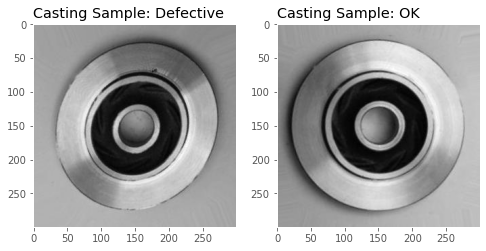

In [28]:
# Specify directory of train data
dir_train = 'casting_data/casting_data/train/'
dir_train_def = dir_train+'def_front/'  # Class label: Defective
dir_train_ok = dir_train+'ok_front/'    # Class label: OK

# Specify directory of test data
dir_test = 'casting_data/casting_data/test/'
dir_test_def = dir_test+'def_front/'
dir_test_ok = dir_test+'ok_front/'

# Plot samples of defective and non-defective casting
fig, axes = plt.subplots(1, 2, figsize=(8,4))
sample_def = plt.imread(dir_train_def+os.listdir(dir_train_def)[0])
sample_ok = plt.imread(dir_train_ok+os.listdir(dir_train_ok)[0])
axes[0].imshow(sample_def)
axes[1].imshow(sample_ok)
axes[0].set_title('Casting Sample: Defective', loc='left')
axes[1].set_title('Casting Sample: OK', loc='left')
axes[0].grid(False)
axes[1].grid(False)
plt.show()

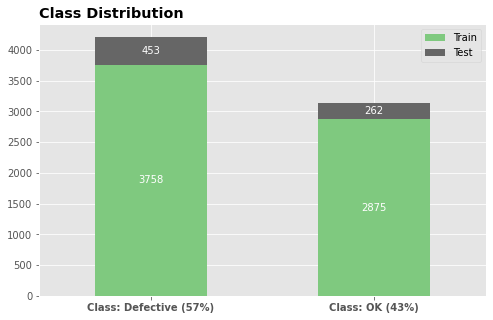

In [29]:
# Create dataframe of class distribution
n_train = [len(os.listdir(dir_train_def)), len(os.listdir(dir_train_ok))]
n_test = [len(os.listdir(dir_test_def)), len(os.listdir(dir_test_ok))]
dist_df = pd.DataFrame(
    data=[n_train, n_test],
    columns=['Defective', 'OK'],
    index=['Train', 'Test'])

# Visualize class distribution
ax = dist_df.T.plot(kind='bar', stacked=True, rot=0, figsize=(8,5), colormap='Accent')
ax.set_title('Class Distribution', loc='left', weight='bold')
for bar in ax.patches:
    ax.text(bar.get_x()+bar.get_width()-0.25, 
            bar.get_y()+bar.get_height()/2,
            int(bar.get_height()),
            ha='center', va='center', color='white')
pct_def = 100*dist_df['Defective'].values.sum()/dist_df.values.sum()
pct_ok = 100-pct_def
ax.set_xticklabels([f'Class: Defective ({pct_def:.0f}%)',
                    f'Class: OK ({pct_ok:.0f}%)'], weight='bold')
plt.show()

In [30]:
# Define instances of ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_gen = ImageDataGenerator(rescale=1./255)

# Specify parameters/arguments for data generation
img_size, batch_size, rand_seed = (300, 300), 64, 0
arg_train = {'target_size': img_size,
             'color_mode': 'grayscale',
             'classes': {'ok_front': 0,
                         'def_front': 1},
             'class_mode': 'binary',
             'batch_size': batch_size,
             'seed': rand_seed}
arg_test = {'target_size': img_size,
            'color_mode': 'grayscale',
            'classes': {'ok_front': 0,
                        'def_front': 1},
            'class_mode': 'binary',
            'batch_size': batch_size,
            'seed': rand_seed,
            'shuffle': False}

# Generate data by iterating through directories
train_set = train_gen.flow_from_directory(
    directory=dir_train, subset='training', **arg_train)
valid_set = train_gen.flow_from_directory(
    directory=dir_train, subset='validation', **arg_train)
test_set = test_gen.flow_from_directory(
    directory=dir_test, **arg_test)

Found 5307 images belonging to 2 classes.
Found 1326 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [31]:
def tunner(learning_rate):
    # Define CNN model architecture
    cnn_model = Sequential([ 
        # First block
        Conv2D(32, 3, activation='relu', padding='same', strides=2,
            input_shape=img_size+(1,)),
        MaxPooling2D(pool_size=2, strides=2),
        # Second block
        Conv2D(64, 3, activation='relu', padding='same', strides=2),
        MaxPooling2D(pool_size=2, strides=2),
        # Flatenning
        Flatten(),
        # Fully connected layers
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')        # Only 1 output
    ])

    # Compile model
    cnn_model.compile(
        optimizer=Adam(learning_rate=learning_rate),  # Default lr
        loss='binary_crossentropy',
        metrics=['accuracy'])

    # Display summary of model architecture
    cnn_model.summary()
    # Fit model using train set and validation set
    n_epochs = 20
    cnn_model.fit(
        train_set,
        validation_data=valid_set,
        epochs=n_epochs,
        callbacks=ModelCheckpoint(
            f'CNN_Casting_Inspection_lr{learning_rate}.hdf5',
            save_best_only=True,
            monitor='val_loss'),
        verbose=1)
    return cnn_model.history.history


In [32]:
lrs = [0.001, 0.01, 0.1]
histories = []
for lr in lrs:
    histories.append(tunner(lr))


2021-12-08 19:21:37.223272: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-08 19:21:37.223340: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-12-08 19:21:37.223374: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-12-08 19:21:37.225054: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2021-12-08 19:21:37.225095: W tensorflow/stream_executor/platform/default/dso_loader

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 19, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 23104)             0         
                                                                 
 dense (Dense)               (None, 128)               2

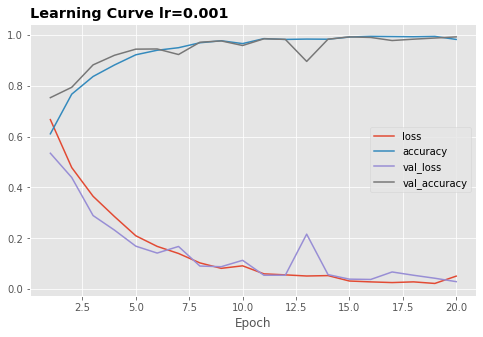

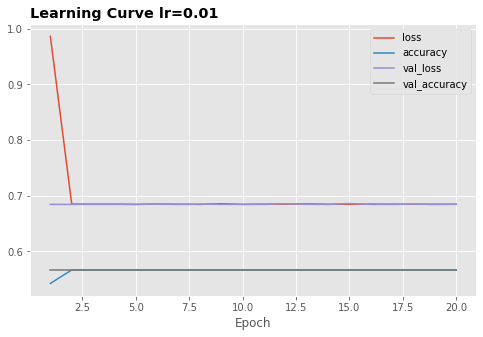

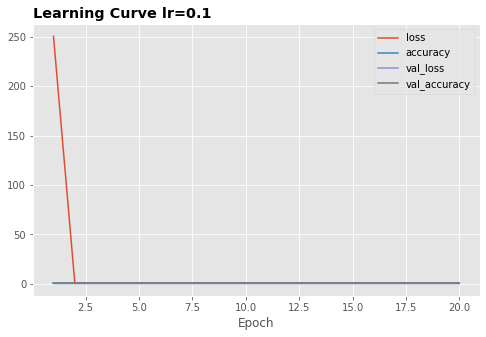

In [35]:
for idx, histo_dict in enumerate(histories):
    # Plot learning curve from model history
    histo_df = pd.DataFrame(histo_dict, index=range(1,20+1))
    # fig, axes = plt.subplots(1, 3, figsize=(12,5))
    fig, ax = plt.subplots(figsize=(8,5))
    for m in histo_df.columns:
        ax.plot(histo_df.index, m, data=histo_df)
    ax.set_xlabel('Epoch')
    ax.set_title(f'Learning Curve lr={lrs[idx]}', loc='left', weight='bold')
    ax.legend()
plt.show()

In [36]:
# Load saved model
best_model = load_model('./CNN_Casting_Inspection_lr0.001.hdf5')

# Make predictions on images in the test set
y_pred_prob = best_model.predict(test_set, verbose=1)
y_pred = (y_pred_prob >= 0.5).reshape(-1,)
y_true = test_set.classes[test_set.index_array]

12/12 [==============================] - 2s 113ms/step


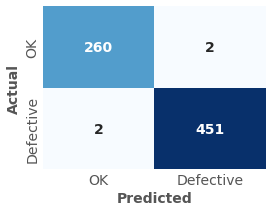

In [37]:
# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(4,3))
ax = sns.heatmap(confusion_matrix(y_true,y_pred), annot=True,
                 annot_kws={'size':14, 'weight':'bold'},
                 fmt='d', cbar=False, cmap='Blues')
ax.set_xticklabels(['OK', 'Defective'])
ax.set_yticklabels(['OK', 'Defective'], va='center')
plt.tick_params(axis='both', labelsize=14, length=0)
plt.ylabel('Actual', size=14, weight='bold')
plt.xlabel('Predicted', size=14, weight='bold')
plt.show()

In [38]:
print(classification_report(y_true, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.9924    0.9924    0.9924       262
           1     0.9956    0.9956    0.9956       453

    accuracy                         0.9944       715
   macro avg     0.9940    0.9940    0.9940       715
weighted avg     0.9944    0.9944    0.9944       715



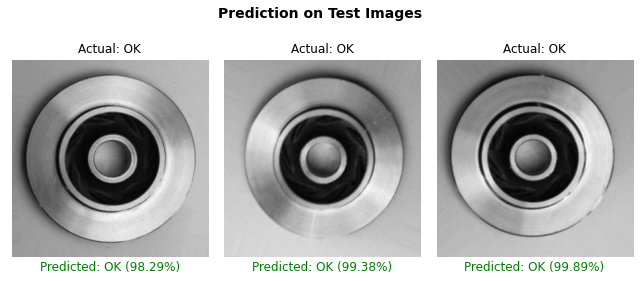

In [39]:
class_map = {0: 'OK', 1: 'Defective'}
images, labels = next(iter(test_set))
images = images.reshape(batch_size,*img_size)

fig, axes = plt.subplots(1, 3, figsize=(9, 4))
fig.suptitle('Prediction on Test Images', y=0.98, weight='bold', size=14)
for ax, img, label in zip(axes.flat, images, labels):
    ax.imshow(img, cmap='gray')
    [[pred_prob]] = best_model.predict(img.reshape(1, *img_size, -1))
    pred_label = class_map[int(pred_prob>=0.5)]
    true_label = class_map[label]
    prob_class = 100*pred_prob if pred_label=='Defective' else 100*(1-pred_prob)
    ax.set_title(f'Actual: {true_label}', size=12)
    ax.set_xlabel(f'Predicted: {pred_label} ({prob_class:.2f}%)',
                  color='g' if pred_label==true_label else 'r')
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

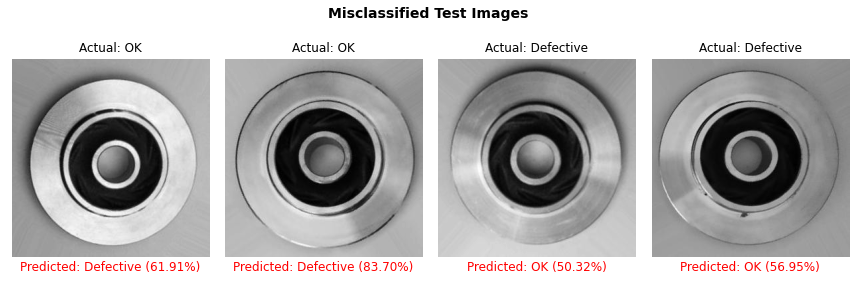

In [40]:
misclassified = np.nonzero(y_pred != y_true)[0]
batch_num = misclassified//batch_size
image_num = misclassified%batch_size

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
fig.suptitle('Misclassified Test Images', y=0.98, weight='bold', size=14)
for ax, bnum, inum in zip(axes.flat, batch_num, image_num):
    images, labels = test_set[bnum]
    img = images[inum]
    ax.imshow(img.reshape(*img_size), cmap='gray')
    [[pred_prob]] = best_model.predict(img.reshape(1, *img_size, -1))
    pred_label = class_map[int(pred_prob>=0.5)]
    true_label = class_map[labels[inum]]
    prob_class = 100*pred_prob if pred_label=='Defective' else 100*(1-pred_prob)
    ax.set_title(f'Actual: {true_label}', size=12)
    ax.set_xlabel(f'Predicted: {pred_label} ({prob_class:.2f}%)',
                  color='g' if pred_label==true_label else 'r')
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

經過tuning，發現learning rate = 0.001的時候學習效果最好，最後使用它做預測的結果如上。
## 4.
### (a).

In [41]:
import matplotlib.pyplot as plt


df = pd.read_csv("Brent Oil Futures Historical Data.csv")
df["Date"] = pd.to_datetime(df["Date"])
# Sort DataFrame by date
df = df.sort_values('Date').reset_index(drop=True)

# Double check the result
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2000-12-10,25.89,26.98,27.82,25.00,85.80K,-2.52%
1,2000-12-17,23.66,26.14,26.84,22.90,149.60K,-8.61%
2,2000-12-24,23.87,24.30,24.54,23.02,64.73K,0.89%
3,2000-12-31,25.18,24.40,26.02,24.20,129.40K,5.49%
4,2001-01-07,25.75,25.33,25.90,24.12,131.12K,2.26%
...,...,...,...,...,...,...,...
1091,2021-11-07,82.17,82.58,85.50,81.26,1.61M,-0.69%
1092,2021-11-14,78.89,81.92,83.14,78.05,1.81M,-3.99%
1093,2021-11-21,72.72,78.58,83.00,72.14,1.20M,-7.82%
1094,2021-11-28,69.88,73.88,77.02,65.72,1.43M,-3.91%


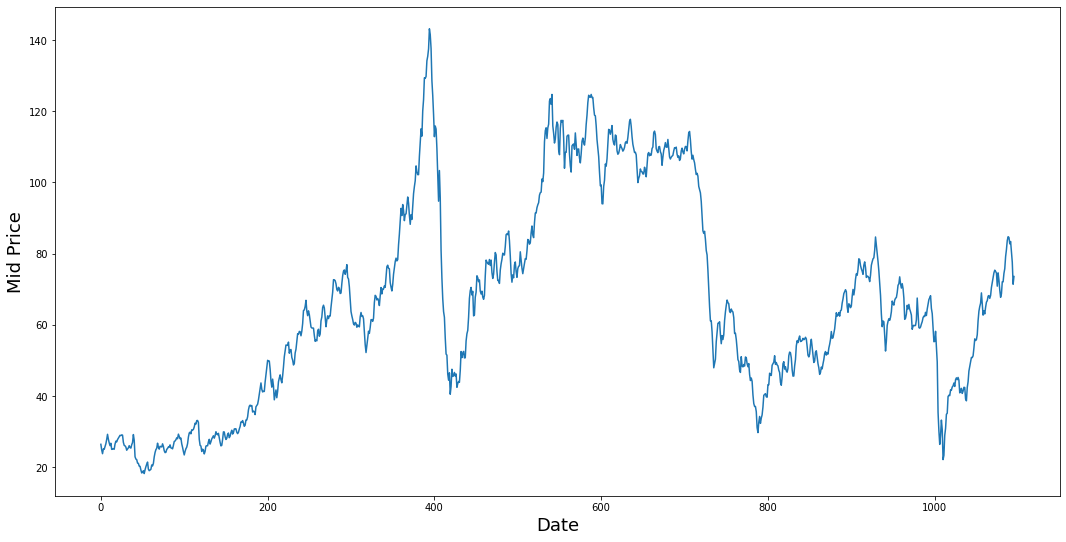

In [ ]:
plt.figure(figsize = (18,9))
# plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
# plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.plot((df['Low']+df['High'])/2)
# plt.xticks(df['Date'],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [ ]:
# First calculate the mid prices from the highest and lowest
high_prices = df["High"]
low_prices = df["Low"]
mid_prices = (high_prices+low_prices)/2.0

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(mid_prices, shuffle=False)
train_data = train_data.to_numpy()
test_data = test_data.to_numpy()

In [ ]:
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [ ]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 100
for di in range(0,len(train_data)-smoothing_window_size,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [ ]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

In [ ]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(len(train_data)):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [ ]:
class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [0.         0.47471344 0.7569252  0.45139322 0.5491866 ]

	Output: [0.012438   0.47471344 0.6261475  0.50904256 0.5612253 ]


Unrolled index 1
	Inputs:  [0.00076029 0.5191958  0.73910785 0.45086655 0.5612253 ]

	Output: [0.00273078 0.6041204  0.57596964 0.50904256 0.5218369 ]


Unrolled index 2
	Inputs:  [0.00273078 0.5577512  0.71015584 0.46199724 0.5609856 ]

	Output: [0.00644613 0.58692664 0.6717775  0.5633958  0.5609856 ]


Unrolled index 3
	Inputs:  [0.00644613 0.58692664 0.6717775  0.48259127 0.54666054]

	Output: [0.012438   0.60786307 0.6261475  0.50904256 0.47142816]


Unrolled index 4
	Inputs:  [0.012438   0.6041204  0.6261475  0.50904256 0.5218369 ]

	Output: [0.07691683 0.60786307 0.57596964 0.59572464 0.47142816]


In [ ]:
D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1
num_unrollings = 10 # Number of time steps you look into the future.
batch_size = 30 # Number of samples in a batch
num_nodes = [100,100,50] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

from tensorflow.python.framework import ops
ops.reset_default_graph()

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

# Input data.
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))

In [ ]:
lstm_cells = [
    tf.nn.rnn_cell.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer=tf.keras.initializers.glorot_normal
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.nn.rnn_cell.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf.nn.rnn_cell.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.keras.initializers.glorot_normal)
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

/tmp/ipykernel_3985343/178823973.py:2: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  tf.nn.rnn_cell.LSTMCell(num_units=num_nodes[li],


In [ ]:
# Create cell state and hidden state variables to maintain the state of the LSTM
c, h = [],[]
initial_state = []
for li in range(n_layers):
  c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  initial_state.append(tf.nn.rnn_cell.LSTMStateTuple(c[li], h[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

/home/cu2189191862/projects/famistore/env/lib/python3.8/site-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:984: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._kernel = self.add_variable(
/home/cu2189191862/projects/famistore/env/lib/python3.8/site-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:993: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._bias = self.add_variable(


In [ ]:
# When calculating the loss you need to be careful about the exact form, because you calculate
# loss of all the unrolled steps at the same time
# Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps

print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(h[li], state[li][1]) for li in range(n_layers)]):
  for ui in range(num_unrollings):
    loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

print('\tAll done')

Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done


In [ ]:
print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf.nn.rnn_cell.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
  sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

Defining prediction related TF functions
	All done


In [ ]:
epochs = 30
valid_summary = 1 # Interval you make test predictions

n_predict_once = 25 # Number of steps you continously predict for

train_seq_length = train_data.size # Full length of the training data
print(f"train_seq_length:{train_seq_length}")
print(f"test len:{len(test_data)}")

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = DataGeneratorSeq(train_data,batch_size,num_unrollings)
print(f"batch_size:{batch_size}")
print(f'num_unrollings:{num_unrollings}')
x_axis_seq = []

# Points you start your test predictions from
test_points_seq = np.arange(len(train_data),len(all_mid_data)-n_predict_once,num_unrollings).tolist()
print(f"test_points_seq:{test_points_seq}")
for ep in range(epochs):       

    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):

        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)

        feed_dict.update({tf_learning_rate: 0.001, tf_min_learning_rate:0.0001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l

    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))

      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))

      train_mse_ot.append(average_loss)

      average_loss = 0 # reset loss

      predictions_seq = []

      mse_test_loss_seq = []

      # ===================== Updating State and Making Predicitons ========================
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []

        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]

        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          current_price = all_mid_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          _ = session.run(sample_prediction,feed_dict=feed_dict)

        feed_dict = {}

        current_price = all_mid_data[w_i-1]

        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)

          our_predictions.append(np.asscalar(pred))

          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)
          # print(w_i+pred_i, end=' ')
          mse_test_loss += 0.5*(pred-all_mid_data[w_i+pred_i])**2

        session.run(reset_sample_states)

        predictions_seq.append(np.array(our_predictions))

        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)

        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)

      current_test_mse = np.mean(mse_test_loss_seq)

      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0

      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')

      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')


train_seq_length:822
test len:274
Initialized
batch_size:30
num_unrollings:10
test_points_seq:[822, 832, 842, 852, 862, 872, 882, 892, 902, 912, 922, 932, 942, 952, 962, 972, 982, 992, 1002, 1012, 1022, 1032, 1042, 1052, 1062]


2021-12-08 19:09:45.725401: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/cu2189191862/projects/famistore/env/lib/python3.8/site-packages/tensorflow/python/client/session.py:1771: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Average loss at step 1: 0.299877


/tmp/ipykernel_3985343/680236243.py:97: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  our_predictions.append(np.asscalar(pred))


	Test MSE: 23.61545
	Finished Predictions
Average loss at step 2: 0.117281
	Test MSE: 24.44268
	Finished Predictions
Average loss at step 3: 0.094733
	Test MSE: 22.50827
	Finished Predictions
Average loss at step 4: 0.076070
	Test MSE: 22.87836
	Finished Predictions
Average loss at step 5: 0.067434
	Test MSE: 19.97559
	Finished Predictions
Average loss at step 6: 0.066918
	Test MSE: 13.64268
	Finished Predictions
Average loss at step 7: 0.050628
	Test MSE: 11.93059
	Finished Predictions
Average loss at step 8: 0.049227
	Test MSE: 13.01559
	Finished Predictions
Average loss at step 9: 0.045525
	Test MSE: 10.73307
	Finished Predictions
Average loss at step 10: 0.040630
	Test MSE: 9.69855
	Finished Predictions
Average loss at step 11: 0.037872
	Test MSE: 9.52946
	Finished Predictions
Average loss at step 12: 0.038659
	Test MSE: 10.22768
	Finished Predictions
Average loss at step 13: 0.032985
	Test MSE: 11.05797
	Finished Predictions
Average loss at step 14: 0.033729
	Decreasing learning r

### (b).

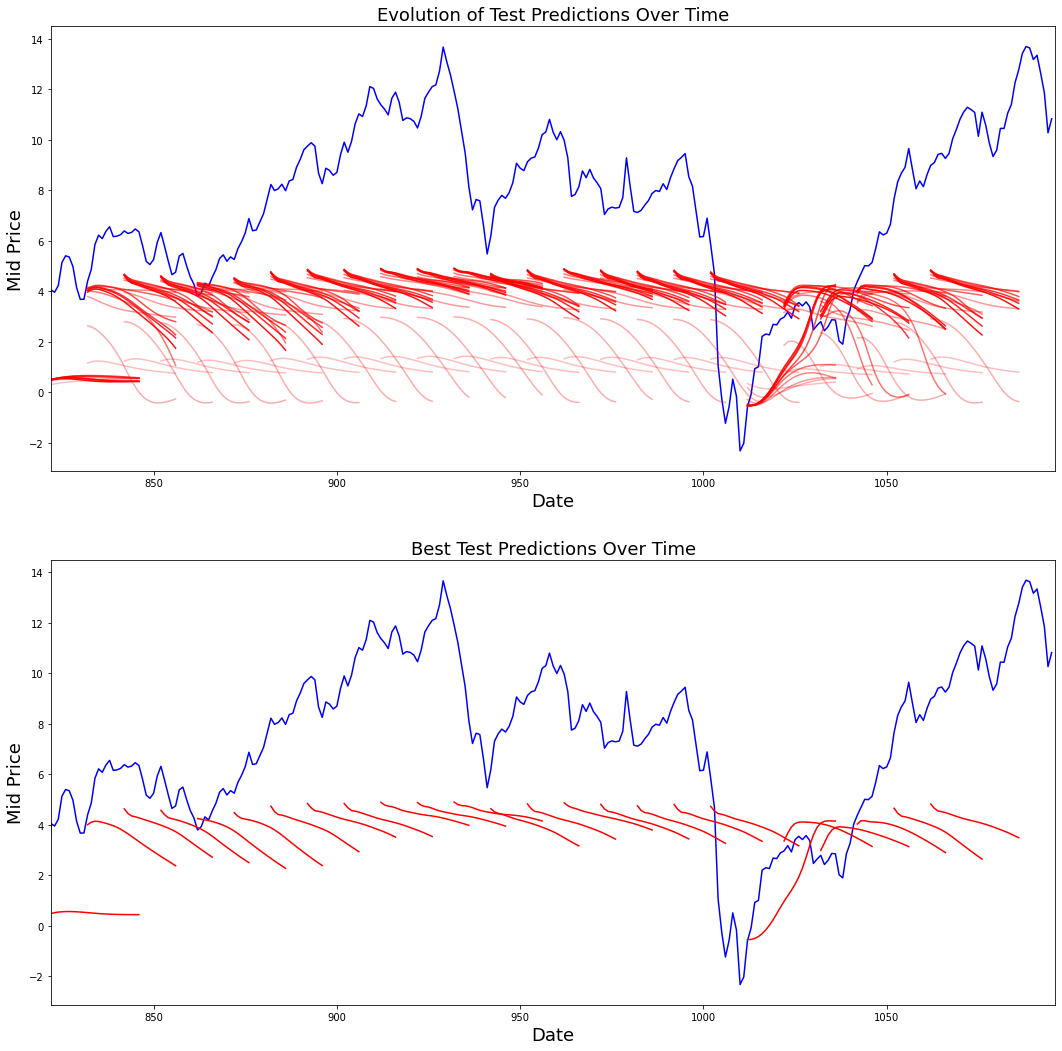

In [ ]:
best_prediction_epoch = 28 # replace this with the epoch that you got the best results when running the plotting code

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(df.shape[0]),all_mid_data,color='b')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='r',alpha=alpha[p_i])

plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(len(train_data),len(all_mid_data))

plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(df.shape[0]),all_mid_data,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')

plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(len(train_data),len(all_mid_data))
plt.show()